In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import cv2
import pickle
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Activation,Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam,SGD,RMSprop,Adadelta
from keras.regularizers import l2
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
path = 'F:\\CAR\\images\\'
img_x = img_y = 50

<img src='Toyota0512_small.jpg'>

In [3]:
l = 'Toyota0512_small.jpg'

re.findall(r'(\w+?)(\d+)', l)[0][0]

'Toyota'

In [4]:
d ='Volvo3215_small.jpg'

re.findall(r'(\w+?)(\d+)', d)[0][0]

'Volvo'

In [5]:
logos =[]

for img in os.listdir(path):
    print(img)
    break

Alfa Romeo10882_small.jpg


In [6]:
logos =[]

for img in os.listdir(path):
    logo = re.findall(r'(\w+?)(\d+)',img)[0][0]
    print(logo)
    break
  

Romeo


In [7]:
for img in os.listdir(path):
    i = np.array(np.array(Image.open(path+img).convert("RGB")).flatten(),order='F',dtype='uint8')
    print(i.shape)
    print(i)
    break

(7500,)
[1 0 2 ... 0 0 0]


In [8]:
logos =[]
images =[]

for img in os.listdir(path):
    logo = re.findall(r'(\w+?)(\d+)',img)[0][0]
    i = np.array(np.array(Image.open(path+img).convert("RGB")).flatten(),order='F',dtype='uint8')
    logos.append(logo)
    images.append(i)
    
  

In [9]:
len(logos)

20778

In [10]:
len(images)

20778

In [11]:
np.array(images).shape

(20778, 7500)

In [12]:
cars = np.unique(np.array(logos))
cars

array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep',
       'Kia', 'Lada', 'Lancia', 'Lexus', 'Maserati', 'Mazda', 'Mercedes',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault',
       'Romeo', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype='<U10')

In [13]:
len(np.unique(np.array(logos)))

39

In [14]:
X = np.array(images)
y = np.array(logos)

In [15]:


pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [16]:
x = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle",'rb'))

In [17]:
x = x/255.0

In [18]:
x[1]

array([0.94509804, 1.        , 1.        , ..., 1.        , 1.        ,
       1.        ])

In [19]:

data, labels = shuffle(x, y, random_state=42) 
train_data = [data, labels]

(20778, 7500) (20778,)


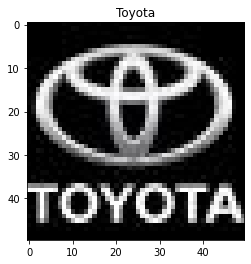

In [20]:
i = 5
print(train_data[0].shape, train_data[1].shape)
plt.imshow(data[i].reshape(img_x, img_y, 3))
plt.title(labels[i])
plt.show()

In [21]:
otr = OneHotEncoder()
y = otr.fit_transform(train_data[1].reshape(-1,1)).toarray()

In [22]:
y.shape

(20778, 39)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_data[0], y, test_size=0.2)

In [24]:
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 3)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 3)

In [25]:
X_train.shape

(16622, 50, 50, 3)

In [26]:
y_train.shape

(16622, 39)

In [27]:
X_test.shape

(4156, 50, 50, 3)

(50, 50, 3) (39,)


C:\Users\prasa\Anaconda3\envs\tfgpu\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


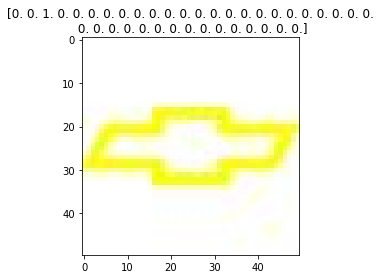

In [28]:
i = 13
print(X_train[i].shape, y_train[i].shape)
plt.imshow(X_train[i])
plt.title(y_train[i])
plt.show()

# Data Augmentation

In [29]:
datagen = ImageDataGenerator(rotation_range=45,width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,zoom_range=0.2,vertical_flip=0.3)

datagen.fit(X_train)

(50, 50, 3) (39,)


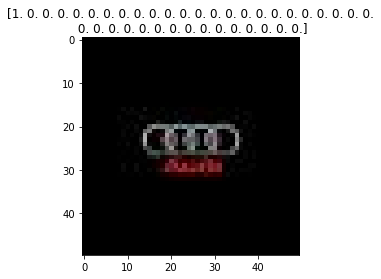

In [30]:
i = 15
print(X_train[i].shape, y_train[i].shape)
plt.imshow(X_train[i])
plt.title(y_train[i])
plt.show()

In [31]:
len(cars)

39

In [32]:
batch_size = 128
n_classes = len(cars)
epochs = 100 #2
n_channels =3

In [33]:

model = Sequential()
model.add(Conv2D(32, (3,3),input_shape=(img_x,img_y,n_channels),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),padding='same',activation='relu') ,)
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(39,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)        

In [34]:
opt = Adam()

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['categorical_accuracy'])

In [35]:
model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size,shuffle=True,seed=100),steps_per_epoch=X_train.shape[0]//batch_size,epochs=epochs,validation_data=(X_test,y_test),workers=4)

Epoch 1/100
129/129 [==============================] - 59s 456ms/step - loss: 3.6141 - categorical_accuracy: 0.0424 - val_loss: 3.5431 - val_categorical_accuracy: 0.0522
Epoch 2/100
129/129 [==============================] - 11s 82ms/step - loss: 3.4878 - categorical_accuracy: 0.0754 - val_loss: 3.3635 - val_categorical_accuracy: 0.1071
Epoch 3/100
129/129 [==============================] - 11s 84ms/step - loss: 3.3054 - categorical_accuracy: 0.1246 - val_loss: 3.1700 - val_categorical_accuracy: 0.1667
Epoch 4/100
129/129 [==============================] - 11s 83ms/step - loss: 3.1606 - categorical_accuracy: 0.1616 - val_loss: 2.9987 - val_categorical_accuracy: 0.2108
Epoch 5/100
129/129 [==============================] - 11s 86ms/step - loss: 3.0574 - categorical_accuracy: 0.1892 - val_loss: 2.8800 - val_categorical_accuracy: 0.2293
Epoch 6/100
129/129 [==============================] - 12s 89ms/step - loss: 2.9620 - categorical_accuracy: 0.2127 - val_loss: 2.7701 - val_categorical_ac

129/129 [==============================] - 10s 75ms/step - loss: 1.3022 - categorical_accuracy: 0.6457 - val_loss: 1.2670 - val_categorical_accuracy: 0.6821
Epoch 50/100
129/129 [==============================] - 10s 76ms/step - loss: 1.3043 - categorical_accuracy: 0.6480 - val_loss: 1.3053 - val_categorical_accuracy: 0.6701
Epoch 51/100
129/129 [==============================] - 10s 76ms/step - loss: 1.2917 - categorical_accuracy: 0.6496 - val_loss: 1.2004 - val_categorical_accuracy: 0.6971
Epoch 52/100
129/129 [==============================] - 10s 75ms/step - loss: 1.2708 - categorical_accuracy: 0.6545 - val_loss: 1.2812 - val_categorical_accuracy: 0.6735
Epoch 53/100
129/129 [==============================] - 10s 80ms/step - loss: 1.2775 - categorical_accuracy: 0.6550 - val_loss: 1.1871 - val_categorical_accuracy: 0.7050
Epoch 54/100
129/129 [==============================] - 12s 97ms/step - loss: 1.2705 - categorical_accuracy: 0.6564 - val_loss: 1.2726 - val_categorical_accuracy: 

129/129 [==============================] - 10s 79ms/step - loss: 0.9426 - categorical_accuracy: 0.7413 - val_loss: 1.0518 - val_categorical_accuracy: 0.7464
Epoch 98/100
129/129 [==============================] - 10s 80ms/step - loss: 0.9531 - categorical_accuracy: 0.7364 - val_loss: 1.0301 - val_categorical_accuracy: 0.7526
Epoch 99/100
129/129 [==============================] - 10s 78ms/step - loss: 0.9504 - categorical_accuracy: 0.7385 - val_loss: 1.0747 - val_categorical_accuracy: 0.7486
Epoch 100/100
129/129 [==============================] - 10s 80ms/step - loss: 0.9303 - categorical_accuracy: 0.7434 - val_loss: 1.0682 - val_categorical_accuracy: 0.7469


In [36]:
scores = model.evaluate(X_test, y_test) 
print("Accuracy test: %.2f%%" % (scores[1]*100))

4156/4156 [==============================] - 1s 328us/step
Accuracy test: 74.69%


In [49]:
image = np.expand_dims(X_test[100], axis=0)
z = model.predict(image)
z

array([[4.5272522e-11, 1.3408184e-07, 9.7902243e-14, 1.2159680e-10,
        1.3255300e-07, 7.7040874e-10, 3.4493533e-14, 6.4957935e-12,
        3.3636539e-16, 1.8740480e-17, 3.6622585e-09, 3.8780023e-08,
        4.2807728e-13, 6.5219823e-14, 2.4658367e-11, 1.2009485e-11,
        3.4690237e-09, 3.1977750e-05, 3.5578243e-13, 5.7091434e-05,
        9.9942833e-01, 4.6194357e-10, 7.3725490e-14, 2.8530187e-09,
        1.3397433e-13, 1.7117285e-13, 4.8208149e-04, 9.6383522e-17,
        7.0290745e-14, 5.4712951e-14, 3.1993528e-16, 1.0920510e-10,
        1.5269288e-11, 1.0937455e-14, 1.1052200e-08, 1.3110080e-07,
        1.8425278e-10, 7.0322997e-12, 1.0783805e-12]], dtype=float32)

In [50]:
z.max()

0.99942833

In [51]:
model.predict_classes(image)

array([20], dtype=int64)

In [52]:
cars[20]

'Mercedes'

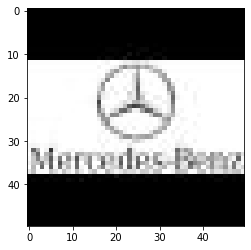

In [53]:
plt.imshow(X_test[100])
plt.show()